<a href="https://colab.research.google.com/github/Krishna-Bhatt/DeepLearning/blob/main/BackPropagationForNonConvexClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pylab as plt
from pandas import read_csv
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
class ANN:
    def __init__(self, layers_size):
        self.layers_size = layers_size
        self.parameters = {}
        self.L = len(self.layers_size)
        self.n = 0
        self.costs = []

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def initialize_parameters(self):
        np.random.seed(1)

        for l in range(1, len(self.layers_size)):
            self.parameters["W" + str(l)] = np.random.randn(self.layers_size[l], self.layers_size[l - 1]) / np.sqrt(
                self.layers_size[l - 1])
            self.parameters["b" + str(l)] = np.zeros((self.layers_size[l], 1))

    def forward(self, X):
        store = {}

        A = X.T
        for l in range(self.L - 1):
            Z = self.parameters["W" + str(l + 1)].dot(A) + self.parameters["b" + str(l + 1)]
            A = self.sigmoid(Z)
            store["A" + str(l + 1)] = A
            store["W" + str(l + 1)] = self.parameters["W" + str(l + 1)]
            store["Z" + str(l + 1)] = Z

        Z = self.parameters["W" + str(self.L)].dot(A) + self.parameters["b" + str(self.L)]
        A = self.sigmoid(Z)
        store["A" + str(self.L)] = A
        store["W" + str(self.L)] = self.parameters["W" + str(self.L)]
        store["Z" + str(self.L)] = Z

        return A, store

    def sigmoid_derivative(self, Z):
        s = 1 / (1 + np.exp(-Z))
        return s * (1 - s)

    def backward(self, X, Y, store):

        derivatives = {}

        store["A0"] = X.T

        A = store["A" + str(self.L)]
        dA = -np.divide(Y, A) + np.divide(1 - Y, 1 - A)

        dZ = dA * self.sigmoid_derivative(store["Z" + str(self.L)])
        dW = dZ.dot(store["A" + str(self.L - 1)].T) / self.n
        db = np.sum(dZ, axis=1, keepdims=True) / self.n
        dAPrev = store["W" + str(self.L)].T.dot(dZ)

        derivatives["dW" + str(self.L)] = dW
        derivatives["db" + str(self.L)] = db

        for l in range(self.L - 1, 0, -1):
            dZ = dAPrev * self.sigmoid_derivative(store["Z" + str(l)])
            dW = 1. / self.n * dZ.dot(store["A" + str(l - 1)].T)
            db = 1. / self.n * np.sum(dZ, axis=1, keepdims=True)
            if l > 1:
                dAPrev = store["W" + str(l)].T.dot(dZ)

            derivatives["dW" + str(l)] = dW
            derivatives["db" + str(l)] = db

        return derivatives

    def fit(self, X, Y, learning_rate=0.01, n_iterations=2500):
        np.random.seed(1)

        self.n = X.shape[0]

        self.layers_size.insert(0, X.shape[1])

        self.initialize_parameters()
        for loop in range(n_iterations):
            A, store = self.forward(X)
            cost = np.squeeze(-(Y.dot(np.log(A.T)) + (1 - Y).dot(np.log(1 - A.T))) / self.n)
            derivatives = self.backward(X, Y, store)

            for l in range(1, self.L + 1):
                self.parameters["W" + str(l)] = self.parameters["W" + str(l)] - learning_rate * derivatives[
                    "dW" + str(l)]
                self.parameters["b" + str(l)] = self.parameters["b" + str(l)] - learning_rate * derivatives[
                    "db" + str(l)]

            if loop % 10 == 0:
                
                self.costs.append(cost)
        print('Cost',cost)
    def predict(self, X, Y):
        A, cache = self.forward(X)
        n = X.shape[0]
        p = np.zeros((1, n))

        for i in range(0, A.shape[1]):
            if A[0, i] > 0.5:
                p[0, i] = 1
            else:
                p[0, i] = 0

        print("Accuracy: " + str(np.sum((p == Y) / n)))

    def plot_cost(self):
        plt.figure()
        plt.plot(np.arange(len(self.costs)), self.costs)
        plt.xlabel("epochs")
        plt.ylabel("cost")
        plt.show()

In [5]:
url = "/content/drive/MyDrive/file.csv"
data = np.array(read_csv(url))

In [6]:
print("Data = ", data)
# normalize the data attributes
normalized = preprocessing.normalize(data)
print("Normalized Data = ", normalized)

Data =  [[-0.1  1.9  0. ]
 [-0.1  1.1  0. ]
 [-0.5  1.8  0. ]
 [-0.5  1.2  0. ]
 [-1.   1.5  0. ]
 [-1.   1.   0. ]
 [-1.7  0.5  0. ]
 [-1.2  0.5  0. ]
 [-1.9  0.   0. ]
 [-1.1  0.   0. ]
 [ 0.1 -0.1  0. ]
 [ 0.5 -0.1  0. ]
 [ 0.1 -1.   0. ]
 [ 0.9 -1.   0. ]
 [ 0.8 -1.1  0. ]
 [ 0.  -1.9  0. ]
 [ 0.5 -1.8  0. ]
 [-1.8 -1.   0. ]
 [-1.5 -1.5  0. ]
 [-1.  -1.8  0. ]
 [-0.5 -1.9  0. ]
 [-1.  -0.5  0. ]
 [-1.5  1.   0. ]
 [ 0.   0.   1. ]
 [ 0.  -0.1  1. ]
 [ 0.  -0.9  1. ]
 [-0.9  0.7  1. ]
 [-0.5 -0.9  1. ]
 [ 0.1 -2.1  1. ]
 [-1.   0.   1. ]
 [ 0.1 -2.9  1. ]
 [ 1.  -1.9  1. ]
 [ 1.  -2.7  1. ]
 [ 1.5  0.8  1. ]
 [ 1.5 -2.5  1. ]
 [ 1.9 -1.   1. ]
 [ 1.1 -1.   1. ]
 [ 0.5  1.   1. ]
 [ 0.5  0.1  1. ]
 [ 1.  -0.5  1. ]
 [-0.5  1.5  0. ]
 [-1.   1.2  0. ]
 [-1.5  0.   0. ]
 [-1.  -1.   0. ]
 [-0.5 -1.5  0. ]
 [ 0.5 -1.   0. ]
 [ 0.5 -1.8  0. ]
 [-0.5 -0.5  1. ]
 [-0.8 -0.8  1. ]
 [ 1.5  0.   1. ]
 [ 1.5 -1.   1. ]
 [ 0.5 -2.5  1. ]
 [-0.5  0.   1. ]
 [ 0.5  0.5  1. ]]
Normalized Data =  

In [7]:
X,y = data[0:41,:2],data[0:41,2]
X_test, y_test = data[41:,:2],data[41:,2]

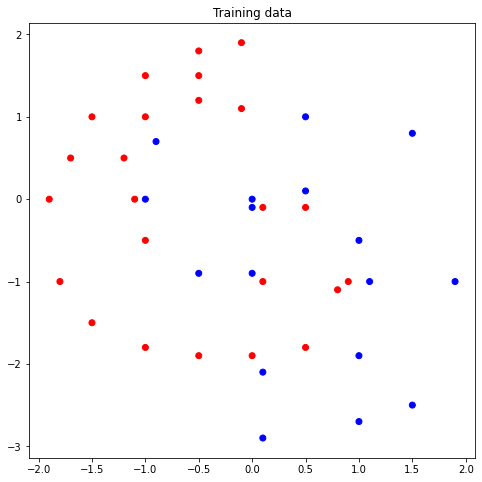

In [10]:
fig = plt.figure(figsize=(8,8))
plt.title('Training data')
plt.scatter(X[:,0],X[:,1], c=y, cmap=matplotlib.colors.ListedColormap(['red','blue']))

In [ ]:
if __name__ == '__main__':
    train_x, train_y, test_x, test_y = X,y,X_test,y_test
    print("train_x's shape: " + str(train_x.shape))
    print("test_x's shape: " + str(test_x.shape))

    layers_dims = [10,10,10,1]

    ann = ANN(layers_dims)
    ann.fit(train_x, train_y, learning_rate=0.999, n_iterations=3000)
    ann.predict(train_x, train_y)
    ann.predict(test_x, test_y)
    ann.plot_cost()